In [1]:
pip install requests pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


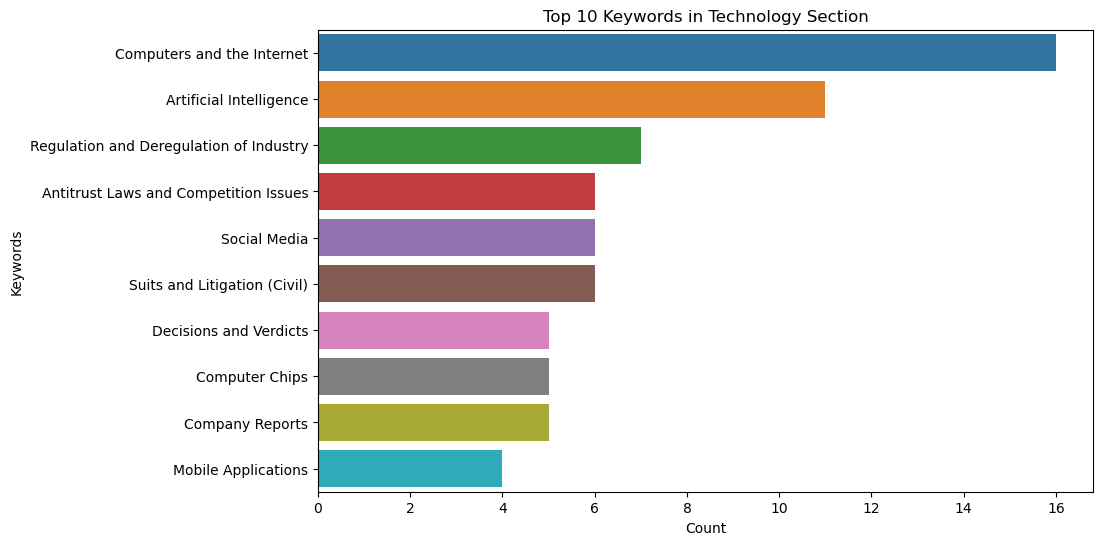

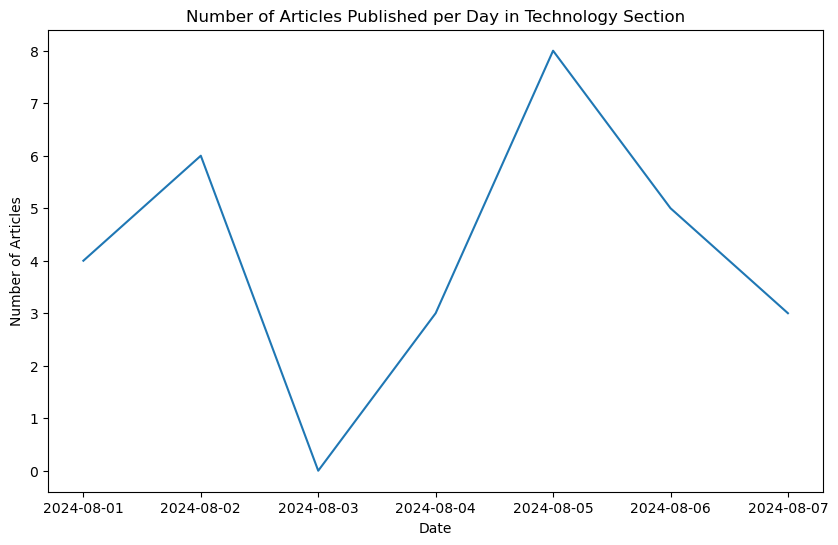

In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


API_KEY = 'ID7IYZBy3PyD7tRqqJg8yZq0Rb0euQA6'
SECTION = 'technology'
BASE_URL = f'https://api.nytimes.com/svc/topstories/v2/{SECTION}.json?api-key={API_KEY}'

def fetch_articles(base_url):
    response = requests.get(base_url)
    if response.status_code == 200:
        data = response.json()
        articles = data['results']
        return articles
    else:
        print('Failed to fetch data')
        return []

def extract_data(articles):
    headlines = []
    pub_dates = []
    keywords = []

    for article in articles:
        headlines.append(article['title'])
        pub_dates.append(article['published_date'])
        # Check if 'des_facet' exists and is a list
        if 'des_facet' in article and isinstance(article['des_facet'], list):
            keywords.append(article['des_facet'])
        else:
            keywords.append([])

    df = pd.DataFrame({
        'headline': headlines,
        'pub_date': pub_dates,
        'keywords': keywords
    })

    return df

def count_keywords(df):
    all_keywords = sum(df['keywords'], [])
    keyword_counts = Counter(all_keywords)
    return keyword_counts

def plot_top_keywords(keyword_counts, top_n=10):
    common_keywords = keyword_counts.most_common(top_n)
    if common_keywords:
        keywords, counts = zip(*common_keywords)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(keywords))
        plt.title(f'Top {top_n} Keywords in {SECTION.capitalize()} Section')
        plt.xlabel('Count')
        plt.ylabel('Keywords')
        plt.show()
    else:
        print("No keywords to display")

def plot_articles_over_time(df):
    if not df.empty:
        df.set_index('pub_date', inplace=True)
        articles_per_day = df.resample('D').size()

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=articles_per_day)
        plt.title(f'Number of Articles Published per Day in {SECTION.capitalize()} Section')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.show()
    else:
        print("DataFrame is empty, cannot plot articles over time")

# Fetch, process, and analyze articles
articles = fetch_articles(BASE_URL)
df = extract_data(articles)
df['pub_date'] = pd.to_datetime(df['pub_date'])
keyword_counts = count_keywords(df)

# Plot results
plot_top_keywords(keyword_counts)
plot_articles_over_time(df)
